# Preparación del modelo

## Importación de librerías

In [2]:
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import seaborn as sns

# Carga de datos

## Geodataframe

In [58]:
agebs = gpd.read_file('data/colima/agebs.gpkg')
agebs_proceso = agebs.copy()
agebs["area"] = agebs.area / 1000 # ha
agebs.drop(columns=["CVE_ENT","CVE_MUN", "CVE_AGEB","CVE_LOC","geometry"], inplace=True)
agebs = pd.DataFrame(agebs)

## Zonal Statistics

In [4]:
df0 = pd.read_csv('data/megaGDF.csv')
df0.drop(columns=["CVE_ENT","CVE_MUN","CVE_LOC", "_count","_sum"], inplace=True)
df0.head()

,CVEGEO,CVE_AGEB,_mean,class,time
0,0600200010676,0676,NaN,Depth,0
1,0600200010727,0727,NaN,Depth,0
2,0600200011142,1142,NaN,Depth,0
3,0600200010411,0411,NaN,Depth,0
4,0600200011068,1068,NaN,Depth,0


In [5]:
df = df0.pivot_table(index=["CVEGEO",'CVE_AGEB',"time"], columns='class', values=["_mean"])
df.reset_index(inplace=True)
# remove double header
df.columns = df.columns.droplevel(0)
df.columns = ['CVEGEO', 'CVE_AGEB',"time", 'Depth', 'Rain', 'Velocity']
df

,CVEGEO,CVE_AGEB,time,Depth,Rain,Velocity
0,0600200010318,0318,0,NaN,0.00,NaN
1,0600200010318,0318,300,NaN,0.00,NaN
2,0600200010318,0318,600,NaN,0.72,NaN
3,0600200010318,0318,900,NaN,0.72,NaN
4,0600200010318,0318,1200,NaN,1.38,NaN
...,...,...,...,...,...,...
2123,0601000010362,0362,23100,0.016889,4.80,0.070683
2124,0601000010362,0362,23400,0.016851,8.76,0.070517
2125,0601000010362,0362,23700,0.016796,8.76,0.070501
2126,0601000010362,0362,24000,0.016748,7.80,0.070419


In [6]:
df = df.merge(agebs, on="CVEGEO")
df

,CVEGEO,CVE_AGEB,time,Depth,Rain,Velocity,area
0,0600200010318,0318,0,NaN,0.00,NaN,339.556144
1,0600200010318,0318,300,NaN,0.00,NaN,339.556144
2,0600200010318,0318,600,NaN,0.72,NaN,339.556144
3,0600200010318,0318,900,NaN,0.72,NaN,339.556144
4,0600200010318,0318,1200,NaN,1.38,NaN,339.556144
...,...,...,...,...,...,...,...
2123,0601000010362,0362,23100,0.016889,4.80,0.070683,227.156848
2124,0601000010362,0362,23400,0.016851,8.76,0.070517,227.156848
2125,0601000010362,0362,23700,0.016796,8.76,0.070501,227.156848
2126,0601000010362,0362,24000,0.016748,7.80,0.070419,227.156848


## Denue and INV

In [7]:
denue_inv = pd.read_csv('data/denue_inv.csv')
denue_inv.head()

,CVE_AGEB,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,VPH_C_EL_P,VPH_EXSA_P,VPH_DREN_P,...,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital
0,0273,74,6.349231,7.081538,13.980769,3.403077,3.540769,30.769231,29.486923,30.769231,...,3.000000,3.000000,2.923077,2.384615,3.000000,3.000000,3.000000,1.0,0.0,0.0
1,0318,1925,11.397551,17.568980,31.385102,10.333878,7.330000,85.303878,85.473878,85.473878,...,2.918367,2.612245,2.346939,1.653061,2.938776,2.979592,2.918367,13.0,6.0,0.0
2,0322,2143,11.647736,17.747170,30.118113,11.442453,7.085472,88.486038,88.553396,88.553396,...,2.924528,2.830189,2.716981,1.320755,3.000000,2.924528,2.849057,13.0,3.0,3.0
3,0362,2342,18.422286,21.292000,33.820000,9.617714,5.100857,91.145714,91.380857,91.380857,...,2.942857,2.914286,2.771429,1.285714,3.000000,2.914286,2.914286,4.0,1.0,1.0
4,0411,1116,9.866053,17.035000,33.167105,11.912895,4.348947,81.578947,81.578947,81.578947,...,2.973684,2.947368,2.868421,1.736842,1.236842,2.973684,2.921053,12.0,2.0,0.0


## Join

In [40]:
df_full = df.merge(denue_inv, on="CVE_AGEB")
df_full

,CVEGEO,CVE_AGEB,time,Depth,Rain,Velocity,area,POBTOT,POB0_14_P,P15A29A_P,...,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital
0,0600200010318,0318,0,NaN,0.00,NaN,339.556144,1925,11.397551,17.56898,...,2.918367,2.612245,2.346939,1.653061,2.938776,2.979592,2.918367,13.0,6.0,0.0
1,0600200010318,0318,300,NaN,0.00,NaN,339.556144,1925,11.397551,17.56898,...,2.918367,2.612245,2.346939,1.653061,2.938776,2.979592,2.918367,13.0,6.0,0.0
2,0600200010318,0318,600,NaN,0.72,NaN,339.556144,1925,11.397551,17.56898,...,2.918367,2.612245,2.346939,1.653061,2.938776,2.979592,2.918367,13.0,6.0,0.0
3,0600200010318,0318,900,NaN,0.72,NaN,339.556144,1925,11.397551,17.56898,...,2.918367,2.612245,2.346939,1.653061,2.938776,2.979592,2.918367,13.0,6.0,0.0
4,0600200010318,0318,1200,NaN,1.38,NaN,339.556144,1925,11.397551,17.56898,...,2.918367,2.612245,2.346939,1.653061,2.938776,2.979592,2.918367,13.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,0601000010362,0362,23100,0.016889,4.80,0.070683,227.156848,2342,18.422286,21.29200,...,2.942857,2.914286,2.771429,1.285714,3.000000,2.914286,2.914286,4.0,1.0,1.0
2124,0601000010362,0362,23400,0.016851,8.76,0.070517,227.156848,2342,18.422286,21.29200,...,2.942857,2.914286,2.771429,1.285714,3.000000,2.914286,2.914286,4.0,1.0,1.0
2125,0601000010362,0362,23700,0.016796,8.76,0.070501,227.156848,2342,18.422286,21.29200,...,2.942857,2.914286,2.771429,1.285714,3.000000,2.914286,2.914286,4.0,1.0,1.0
2126,0601000010362,0362,24000,0.016748,7.80,0.070419,227.156848,2342,18.422286,21.29200,...,2.942857,2.914286,2.771429,1.285714,3.000000,2.914286,2.914286,4.0,1.0,1.0


In [41]:
df_full.sort_values(by=["time"], inplace=True)
df_full

,CVEGEO,CVE_AGEB,time,Depth,Rain,Velocity,area,POBTOT,POB0_14_P,P15A29A_P,...,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital
0,0600200010318,0318,0,NaN,0.0,NaN,339.556144,1925,11.397551,17.568980,...,2.918367,2.612245,2.346939,1.653061,2.938776,2.979592,2.918367,13.0,6.0,0.0
245,0600200010676,0676,0,NaN,0.0,NaN,381.991619,2119,18.954194,19.591290,...,2.935484,2.709677,2.806452,1.451613,3.000000,2.838710,2.935484,9.0,1.0,0.0
327,0600200010680,0680,0,NaN,0.0,NaN,315.090313,1467,10.623214,20.527500,...,2.892857,2.928571,2.392857,1.464286,3.000000,3.000000,2.857143,12.0,2.0,1.0
409,0600200010708,0708,0,NaN,0.0,NaN,314.927699,1086,9.315185,16.823333,...,2.851852,2.185185,2.666667,1.555556,3.000000,2.925926,2.888889,12.0,0.0,4.0
490,0600200010712,0712,0,NaN,0.0,NaN,417.701078,2482,12.117353,21.365588,...,2.941176,2.000000,2.529412,1.705882,3.000000,3.000000,2.911765,11.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,0600200011458,1458,24300,0.047361,NaN,NaN,205.589137,2076,16.024412,17.380588,...,2.941176,2.911765,2.735294,1.500000,3.000000,2.764706,2.882353,5.0,5.0,1.0
653,0600200010727,0727,24300,0.075082,NaN,NaN,656.062487,4375,15.677234,19.972128,...,2.851064,2.872340,2.468085,1.425532,2.914894,2.936170,2.872340,3.0,4.0,0.0
735,0600200010731,0731,24300,0.088734,NaN,NaN,357.631414,2350,13.676977,19.811395,...,2.930233,2.697674,2.813953,1.395349,3.000000,2.930233,2.930233,3.0,2.0,0.0
1390,0600200011068,1068,24300,0.142666,NaN,NaN,715.165608,1974,15.855957,21.856170,...,3.000000,3.000000,2.638298,1.319149,1.106383,2.957447,2.957447,7.0,3.0,0.0


In [42]:
# Calcular la cantidad de agua acumulada por área durante la tormenta
df_full["acum_agua"] = df_full["Depth"] * df_full["area"]

df_proceso = df_full.copy()


# Calcular el índice de riesgo basado en la cantidad de agua acumulada y la densidad poblacional
df_full["riesgo"] = np.where(df_full["POBTOT"] == 0, 0, df_full["acum_agua"] / df_full["POBTOT"])

C:\Users\pedro\AppData\Local\Temp\ipykernel_22624\3692079245.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_full.corr()[["riesgo"]], annot=True, fmt=".2f", cmap="coolwarm", ax=ax)


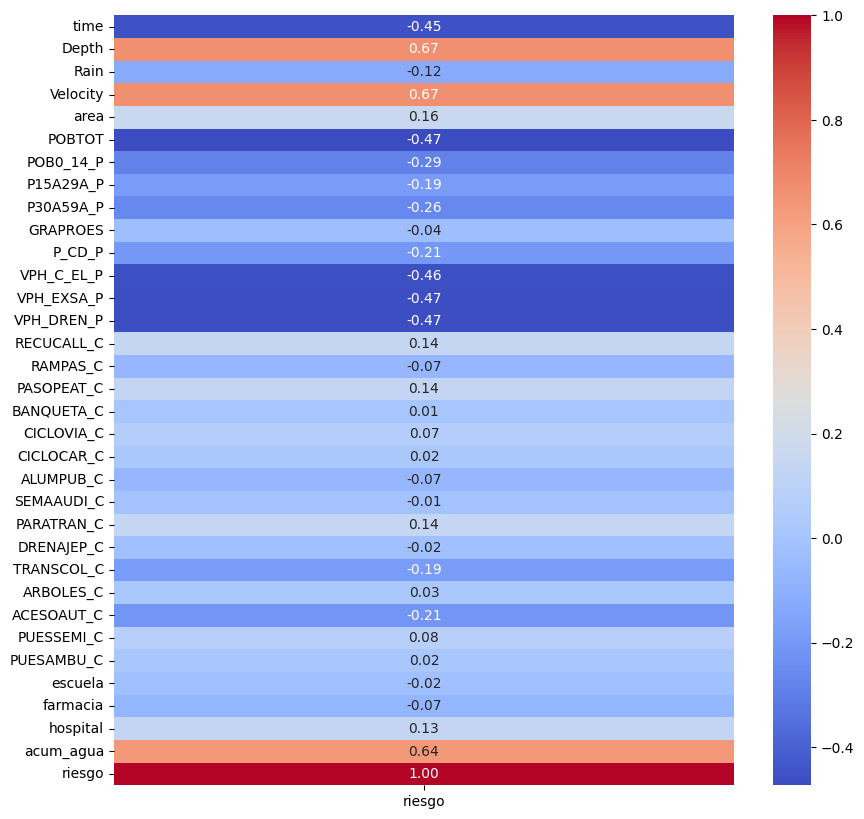

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_full.corr()[["riesgo"]], annot=True, fmt=".2f", cmap="coolwarm", ax=ax)


plt.show()

In [44]:
list_area = ["POBTOT",'RECUCALL_C', 'RAMPAS_C', 'PASOPEAT_C',
       'BANQUETA_C', 'CICLOVIA_C', 'CICLOCAR_C', 'ALUMPUB_C', 'SEMAAUDI_C',
       'PARATRAN_C', 'DRENAJEP_C', 'TRANSCOL_C', 'ARBOLES_C', 'ACESOAUT_C',
       'PUESSEMI_C', 'PUESAMBU_C', 'escuela', 'farmacia', 'hospital']

for i in list_area:
    df_full[i] = df_full[i] / df_full["area"]

In [45]:
df_full.columns

Index(['CVEGEO', 'CVE_AGEB', 'time', 'Depth', 'Rain', 'Velocity', 'area',
       'POBTOT', 'POB0_14_P', 'P15A29A_P', 'P30A59A_P', 'GRAPROES', 'P_CD_P',
       'VPH_C_EL_P', 'VPH_EXSA_P', 'VPH_DREN_P', 'RECUCALL_C', 'RAMPAS_C',
       'PASOPEAT_C', 'BANQUETA_C', 'CICLOVIA_C', 'CICLOCAR_C', 'ALUMPUB_C',
       'SEMAAUDI_C', 'PARATRAN_C', 'DRENAJEP_C', 'TRANSCOL_C', 'ARBOLES_C',
       'ACESOAUT_C', 'PUESSEMI_C', 'PUESAMBU_C', 'escuela', 'farmacia',
       'hospital', 'acum_agua', 'riesgo'],
      dtype='object')

In [46]:
#df_full.replace([np.nan], 0, inplace=True)

df_full.dropna(subset="Depth",inplace=True)
df_full.drop(columns=["CVEGEO","area"], inplace=True)

In [47]:
df_full.describe()

,time,Depth,Rain,Velocity,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,...,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital,acum_agua,riesgo
count,1509.000000,1509.000000,1487.000000,1465.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,...,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,15328.827038,0.264942,6.715118,0.766056,4.547788,13.384228,18.547461,33.198085,10.625533,5.639650,...,0.006887,0.004005,0.007247,0.007619,0.007517,0.021146,0.007001,0.002497,116.728990,0.092519
std,5538.374448,0.233180,7.454504,0.627469,2.279704,4.072494,2.626344,3.714958,1.527477,2.807380,...,0.002316,0.001280,0.002797,0.002306,0.002324,0.015089,0.007269,0.003355,110.073007,0.127077
min,3600.000000,0.010123,0.000000,0.006398,0.763735,5.978372,13.757209,26.724800,7.758302,1.448605,...,0.003689,0.001845,0.001547,0.004135,0.004135,0.004147,0.000000,0.000000,3.719586,0.001624
25%,10800.000000,0.084680,1.800000,0.250919,2.764829,10.822368,17.035000,29.926604,9.587692,2.667925,...,0.005667,0.003117,0.005529,0.006300,0.006221,0.008389,0.002618,0.000000,31.983525,0.019099
50%,15600.000000,0.184516,3.600000,0.626592,4.594784,12.117353,18.112558,33.167105,10.333878,5.850000,...,0.006744,0.003926,0.006923,0.007182,0.007056,0.015385,0.004764,0.002100,79.912248,0.049378
75%,20100.000000,0.393369,8.760000,1.045419,5.669166,15.588140,19.972128,36.726970,11.912895,7.507209,...,0.007594,0.004830,0.008389,0.008359,0.008232,0.031621,0.008164,0.003720,169.269374,0.118440
max,24300.000000,1.005461,36.300000,2.407312,10.310057,25.316415,25.398293,40.178511,13.536364,10.405106,...,0.013369,0.007683,0.014592,0.014291,0.014020,0.059733,0.032164,0.012701,469.808365,0.782463


# Modelo

In [48]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

El archivo CSV 'datos_inundacion.csv' deberá contener las variables de entrada (características) y la variable de salida (nivel de inundación).

A continuación, separamos las características de la variable de salida y dividimos los datos en conjuntos de entrenamiento y prueba:

python

In [17]:
df_full

,CVE_AGEB,time,Depth,Rain,Velocity,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,...,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital,acum_agua,riesgo
1239,1053,3600,0.245698,0.0,1.922391,0.763735,10.981154,17.305000,27.587692,9.103462,...,0.005667,0.003117,0.007273,0.007367,0.007273,0.007367,0.002456,0.004911,100.050616,0.321706
1321,1068,3600,0.416040,0.0,2.214135,2.760200,15.855957,21.856170,40.178511,13.274681,...,0.003689,0.001845,0.001547,0.004135,0.004135,0.009788,0.004195,0.000000,297.537596,0.150728
1567,1227,3600,0.180206,0.0,0.377539,2.961125,15.588140,13.757209,34.650698,11.045116,...,0.005812,0.002540,0.006300,0.006300,0.006300,0.012601,0.000000,0.002100,85.808834,0.060857
1404,1072,3900,0.655693,0.0,2.369761,5.271819,11.944318,22.513864,38.476364,13.536364,...,0.007979,0.003926,0.005129,0.008359,0.008232,0.019505,0.008359,0.000000,235.321353,0.124377
1322,1068,3900,0.638252,0.0,2.210387,2.760200,15.855957,21.856170,40.178511,13.274681,...,0.003689,0.001845,0.001547,0.004135,0.004135,0.009788,0.004195,0.000000,456.455657,0.231234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,1458,24300,0.047361,NaN,NaN,10.097810,16.024412,17.380588,33.346176,8.197353,...,0.013305,0.007296,0.014592,0.013448,0.014020,0.024320,0.024320,0.004864,9.736906,0.004690
653,0727,24300,0.075082,NaN,NaN,6.668572,15.677234,19.972128,37.441277,10.088085,...,0.003762,0.002173,0.004443,0.004475,0.004378,0.004573,0.006097,0.000000,49.258662,0.011259
735,0731,24300,0.088734,NaN,NaN,6.571011,13.676977,19.811395,31.405349,10.536047,...,0.007868,0.003902,0.008389,0.008193,0.008193,0.008389,0.005592,0.000000,31.734214,0.013504
1390,1068,24300,0.142666,NaN,NaN,2.760200,15.855957,21.856170,40.178511,13.274681,...,0.003689,0.001845,0.001547,0.004135,0.004135,0.009788,0.004195,0.000000,102.029479,0.051687


In [18]:
import matplotlib.pyplot as plt

(array([241., 103., 126.,  99.,  94.,  82., 107.,  45.,  36.,  18.,  57.,
         55.,  23.,  15.,  37.,  19.,  45.,  17.,   5.,  11.,  12.,  24.,
          9.,  24.,  10.,  14.,  25.,  19.,   6.,   7.,   2.,   2.,   1.,
          2.,  16.,   0.,   0.,   1.,  26.,   9.,  15.,  12.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,  18.,   6.,   1.,   0.,   2.,   1.,
          4.]),
 array([0.00162439, 0.00943278, 0.01724116, 0.02504955, 0.03285793,
        0.04066632, 0.0484747 , 0.05628309, 0.06409147, 0.07189986,
        0.07970824, 0.08751663, 0.09532501, 0.1031334 , 0.11094178,
        0.11875017, 0.12655855, 0.13436694, 0.14217532, 0.14998371,
        0.15779209, 0.16560048, 0.17340886, 0.

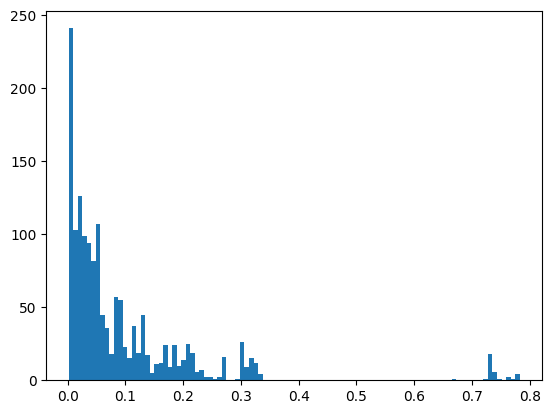

In [19]:
## histograma de la variable a predecir
plt.hist(df_full["riesgo"], bins=100)

C:\Users\pedro\AppData\Local\Temp\ipykernel_22624\960435501.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_full.corr()[["riesgo"]], annot=True, fmt=".2f", cmap="coolwarm")


<Axes: >

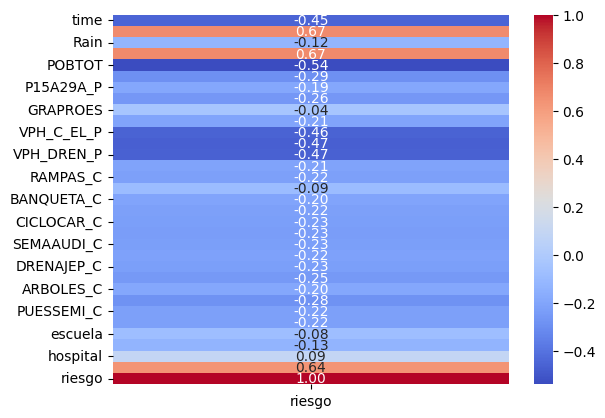

In [20]:

## print heatmap of correlation matrix
sns.heatmap(df_full.corr()[["riesgo"]], annot=True, fmt=".2f", cmap="coolwarm")


In [21]:
df_full.corr()

C:\Users\pedro\AppData\Local\Temp\ipykernel_22624\936249266.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_full.corr()


,time,Depth,Rain,Velocity,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,...,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital,acum_agua,riesgo
time,1.000000,-0.581069,0.130708,-0.614777,0.191339,0.097367,0.070085,0.013140,-0.120308,0.069961,...,0.148766,0.153441,0.163626,0.148300,0.147416,-0.017790,0.033851,0.038512,-0.572922,-0.453875
Depth,-0.581069,1.000000,-0.153129,0.930269,-0.345930,-0.233945,-0.016724,0.058506,0.242265,0.037693,...,-0.249793,-0.164536,-0.410837,-0.274242,-0.274450,0.112809,-0.065842,-0.028894,0.938589,0.668871
Rain,0.130708,-0.153129,1.000000,-0.158287,0.075310,0.035821,0.012264,-0.002011,-0.051222,0.024640,...,0.069340,0.071161,0.073210,0.068075,0.068144,-0.002506,0.023329,0.021746,-0.152770,-0.124797
Velocity,-0.614777,0.930269,-0.158287,1.000000,-0.345950,-0.142839,0.030645,0.045308,0.192269,-0.018763,...,-0.276011,-0.219186,-0.412694,-0.294480,-0.281740,-0.030497,-0.147279,-0.194212,0.905487,0.669641
POBTOT,0.191339,-0.345930,0.075310,-0.345950,1.000000,0.516909,0.433225,0.281947,-0.175446,0.283873,...,0.689411,0.522455,0.640666,0.656387,0.673633,-0.001596,0.182068,-0.053663,-0.367442,-0.538209
POB0_14_P,0.097367,-0.233945,0.035821,-0.142839,0.516909,1.000000,0.493632,0.204994,-0.377548,-0.147304,...,0.229067,-0.073400,0.182244,0.153566,0.193561,-0.448430,-0.366787,-0.402512,-0.153967,-0.285902
P15A29A_P,0.070085,-0.016724,0.012264,0.030645,0.433225,0.493632,1.000000,0.593326,0.211125,0.031288,...,0.065343,-0.059537,-0.055845,0.056180,0.069408,-0.122832,-0.142651,-0.322849,0.008970,-0.190616
P30A59A_P,0.013140,0.058506,-0.002011,0.045308,0.281947,0.204994,0.593326,1.000000,0.546015,0.086454,...,-0.116788,-0.100563,-0.277274,-0.135265,-0.127448,-0.013472,0.023456,-0.336588,0.155808,-0.259978
GRAPROES,-0.120308,0.242265,-0.051222,0.192269,-0.175446,-0.377548,0.211125,0.546015,1.000000,-0.161176,...,-0.210922,-0.270737,-0.425041,-0.204155,-0.218653,0.256191,-0.028857,-0.080142,0.229919,-0.035106
P_CD_P,0.069961,0.037693,0.024640,-0.018763,0.283873,-0.147304,0.031288,0.086454,-0.161176,1.000000,...,-0.067200,0.228201,0.133294,-0.047975,-0.061088,0.383409,0.301233,0.208160,0.032817,-0.206494


In [22]:
# take the last row 
df_full.corr().iloc[-1].sort_values(ascending=False)

C:\Users\pedro\AppData\Local\Temp\ipykernel_22624\2244240114.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_full.corr().iloc[-1].sort_values(ascending=False)


riesgo        1.000000
Velocity      0.669641
Depth         0.668871
acum_agua     0.636056
hospital      0.087668
GRAPROES     -0.035106
escuela      -0.076193
PASOPEAT_C   -0.092812
Rain         -0.124797
farmacia     -0.131660
P15A29A_P    -0.190616
ARBOLES_C    -0.195712
BANQUETA_C   -0.201772
P_CD_P       -0.206494
RECUCALL_C   -0.208494
PARATRAN_C   -0.217989
RAMPAS_C     -0.221989
PUESSEMI_C   -0.223034
CICLOVIA_C   -0.223090
PUESAMBU_C   -0.224199
SEMAAUDI_C   -0.226835
CICLOCAR_C   -0.227429
DRENAJEP_C   -0.230892
ALUMPUB_C    -0.233591
TRANSCOL_C   -0.252177
P30A59A_P    -0.259978
ACESOAUT_C   -0.284432
POB0_14_P    -0.285902
time         -0.453875
VPH_C_EL_P   -0.458174
VPH_DREN_P   -0.465282
VPH_EXSA_P   -0.466858
POBTOT       -0.538209
Name: riesgo, dtype: float64

In [49]:
df_full.drop(columns=["CVE_AGEB"], inplace=True)
df_full.dropna(inplace=True)
df_full

,time,Depth,Rain,Velocity,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,...,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital,acum_agua,riesgo
1239,3600,0.245698,0.0,1.922391,0.763735,10.981154,17.305000,27.587692,9.103462,2.170385,...,0.005667,0.003117,0.007273,0.007367,0.007273,0.007367,0.002456,0.004911,100.050616,0.321706
1321,3600,0.416040,0.0,2.214135,2.760200,15.855957,21.856170,40.178511,13.274681,2.646170,...,0.003689,0.001845,0.001547,0.004135,0.004135,0.009788,0.004195,0.000000,297.537596,0.150728
1567,3600,0.180206,0.0,0.377539,2.961125,15.588140,13.757209,34.650698,11.045116,1.448605,...,0.005812,0.002540,0.006300,0.006300,0.006300,0.012601,0.000000,0.002100,85.808834,0.060857
1404,3900,0.655693,0.0,2.369761,5.271819,11.944318,22.513864,38.476364,13.536364,1.858182,...,0.007979,0.003926,0.005129,0.008359,0.008232,0.019505,0.008359,0.000000,235.321353,0.124377
1322,3900,0.638252,0.0,2.210387,2.760200,15.855957,21.856170,40.178511,13.274681,2.646170,...,0.003689,0.001845,0.001547,0.004135,0.004135,0.009788,0.004195,0.000000,456.455657,0.231234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,24000,0.144098,7.8,0.522681,2.760200,15.855957,21.856170,40.178511,13.274681,2.646170,...,0.003689,0.001845,0.001547,0.004135,0.004135,0.009788,0.004195,0.000000,103.053631,0.052205
1143,24000,0.063593,7.8,0.282199,3.413160,10.822368,17.487105,32.854474,12.406842,2.937368,...,0.006188,0.002635,0.006923,0.006985,0.006985,0.009313,0.006985,0.000000,27.314121,0.018632
1799,24000,0.270045,7.8,0.880352,2.764829,11.468462,19.808077,37.184615,9.587692,9.731923,...,0.005410,0.004396,0.006593,0.006424,0.006340,0.015385,0.004396,0.002198,122.870550,0.097671
816,24000,0.119045,7.8,0.171652,2.164186,5.978372,14.797209,29.127209,9.612791,7.193721,...,0.006037,0.005022,0.006839,0.006518,0.005931,0.059733,0.032164,0.009190,51.816535,0.055007


In [24]:
# Dividimos los datos en características y variable objetivo
X = df_full.drop('riesgo', axis=1)
y = df_full['riesgo']

In [25]:
# Luego, normalizamos las características para que tengan una media de cero y una desviación estándar de uno:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Luego, normalizamos las características para que tengan una media de cero y una desviación estándar de uno:

In [26]:

# Normalizamos las características
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_norm = (X_train - mean) / std
X_test_norm = (X_test - mean) / std


Ahora, construimos la red neuronal utilizando la API secuencial de Keras de TensorFlow:

In [27]:

# Construimos la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_norm.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

La red neuronal tiene dos capas ocultas de 64 neuronas cada una con una función de activación ReLU y una capa de salida con una neurona sin función de activación.

Finalmente, compilamos y entrenamos la red neuronal con los datos de entrenamiento:

In [28]:
X_train_norm

,time,Depth,Rain,Velocity,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,...,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital,acum_agua
1225,1.598368,-0.879172,0.144155,-0.778210,-1.446950,-0.706702,-1.117541,-1.749783,-0.677104,-1.381887,...,-0.489676,-0.475633,-0.424318,-0.436250,-0.615304,-0.565264,-1.124627,-0.950929,-0.742840,-0.802383
2122,1.380854,-1.070185,-0.254312,-1.118583,2.542230,1.217454,1.051216,0.177505,-0.645336,-0.198911,...,2.394147,2.311460,1.285790,2.158059,2.282186,2.307200,-0.243072,-0.363721,0.564716,-1.040294
439,-1.120560,1.425671,-0.740441,0.897923,-0.484654,-0.980486,-0.648323,-1.263456,0.295463,0.799714,...,-0.113478,0.684394,0.719548,0.822871,0.730698,0.717994,1.099062,-0.950929,3.029711,0.664252
69,1.000204,-0.191412,-0.501361,0.290162,0.494990,-0.477920,-0.364737,-0.483893,-0.172477,0.594785,...,0.207676,0.006288,0.663676,0.506829,0.504537,0.466532,1.110934,1.406057,-0.742840,-0.380878
1954,1.163339,-0.964761,-0.652778,-0.949835,2.448601,0.638743,-0.436386,0.048799,-1.583153,0.067825,...,2.961862,2.792723,2.571363,2.660641,2.553288,2.824690,0.196428,2.293119,0.701887,-0.997030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.945825,-0.768133,-0.501361,-0.812549,0.935859,0.554954,0.549237,1.161161,-0.334766,1.689691,...,-1.203477,-1.366609,-1.454309,-1.020981,-1.380566,-1.366205,-1.096762,-0.137664,-0.742840,-0.547164
1875,1.272097,-1.052136,-0.740441,-1.136788,2.168971,2.710466,2.612936,0.594825,-1.496376,-0.493178,...,1.617326,1.634201,0.915781,1.326763,1.482091,1.514016,-0.915783,-0.461636,-0.742840,-1.022625
547,0.347661,-0.702685,0.367297,-1.013793,0.615367,-0.304201,1.079203,0.643115,0.250058,1.529219,...,-1.028959,-0.366913,0.047383,-0.027352,-0.193815,-0.239233,0.328335,0.007088,-0.031757,-0.680381
161,1.598368,-0.791336,0.144155,-0.989027,0.566827,-0.417540,-0.296967,-0.828048,0.559478,0.507720,...,0.211519,0.216495,-0.337363,0.328907,0.146732,0.100915,0.920583,0.138089,1.682114,-0.798010


In [29]:
# Compilamos y entrenamos la red neuronal
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(X_train_norm, y_train, epochs=100, batch_size=16, validation_split=0.2)



Epoch 1/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0166 - mae: 0.0846 - val_loss: 0.0026 - val_mae: 0.0385
Epoch 2/100
59/59 [==============================] - 0s 964us/step - loss: 0.0051 - mae: 0.0482 - val_loss: 0.0118 - val_mae: 0.0890
Epoch 3/100
59/59 [==============================] - 0s 951us/step - loss: 0.0053 - mae: 0.0521 - val_loss: 0.0070 - val_mae: 0.0533
Epoch 4/100
59/59 [==============================] - 0s 941us/step - loss: 0.0041 - mae: 0.0442 - val_loss: 0.0058 - val_mae: 0.0502
Epoch 5/100
59/59 [==============================] - 0s 948us/step - loss: 0.0039 - mae: 0.0431 - val_loss: 0.0018 - val_mae: 0.0316
Epoch 6/100
59/59 [==============================] - 0s 951us/step - loss: 0.0033 - mae: 0.0403 - val_loss: 0.0053 - val_mae: 0.0556
Epoch 7/100
59/59 [==============================] - 0s 968us/step - loss: 0.0033 - mae: 0.0414 - val_loss: 0.0018 - val_mae: 0.0338
Epoch 8/100
59/59 [==============================] - 0s 941us/step - lo

En este ejemplo, estamos utilizando el optimizador RMSprop y la función de pérdida MSE (mean squared error) con una métrica adicional de MAE (mean absolute error). Además, estamos entrenando la red durante 100 épocas con un tamaño de lote de 16 y una validación del 20%.

Finalmente, podemos evaluar el rendimiento del modelo con los datos de prueba y ver las predicciones para algunos ejemplos:

In [30]:
# save model
model.save('model.h5')

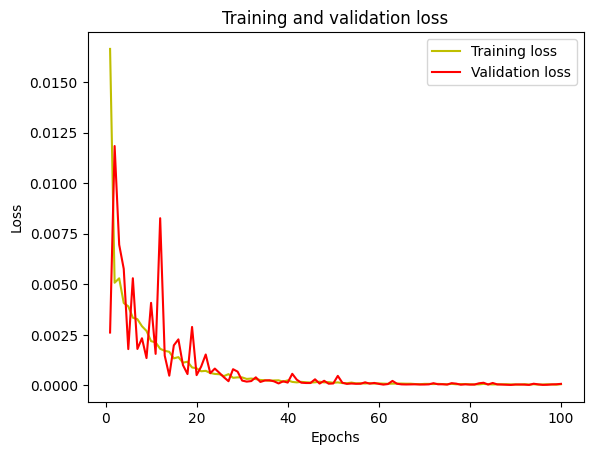

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("training_validation.png", dpi = 300)
plt.show()


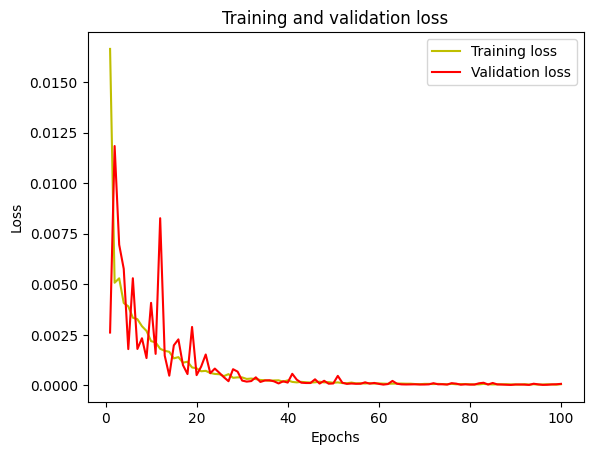

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("training_validation.png", dpi = 300)
plt.show()

In [33]:
# Evaluamos el rendimiento del modelo
mse, mae = model.evaluate(X_test_norm, y_test)

# Hacemos algunas predicciones
X_new = X_test_norm[:3]
y_pred = model.predict(X_new)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('Predictions:', y_pred.flatten())


1/1 [==============================] - 0s 49ms/step
Mean squared error: 7.208056922536343e-05
Mean absolute error: 0.006539433263242245
Predictions: [0.01382407 0.19323492 0.04291706]


In [34]:
X_test_norm

,time,Depth,Rain,Velocity,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,...,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital,acum_agua
961,0.619554,-0.806594,0.064462,-0.890626,0.021047,-0.526271,-0.158001,0.316795,-0.527896,0.200724,...,-0.623052,-0.703059,0.271926,-0.273430,-0.513519,-0.552700,-0.966977,-0.076621,-0.093889,-0.744840
1745,-1.338075,1.227330,-0.596993,1.684052,-0.786203,-0.460806,0.486845,1.091444,-0.665158,1.450001,...,-0.584324,-0.648305,0.292240,-0.240931,-0.526086,-0.513559,-0.388739,-0.364609,-0.090050,1.244009
358,-1.066182,-0.195154,-0.740441,-0.517943,0.047967,-0.664801,0.760458,0.563902,1.449218,-0.151657,...,0.889323,0.303727,0.489938,0.821088,0.831669,0.672144,1.097774,-0.104262,0.199811,-0.433478
1927,-0.304882,-0.838090,2.303845,-0.693779,2.448601,0.638743,-0.436386,0.048799,-1.583153,0.067825,...,2.961862,2.792723,2.571363,2.660641,2.553288,2.824690,0.196428,2.293119,0.701887,-0.941008
630,0.402039,-0.749623,0.032585,-0.791370,0.935859,0.554954,0.549237,1.161161,-0.334766,1.689691,...,-1.203477,-1.366609,-1.454309,-1.020981,-1.380566,-1.366205,-1.096762,-0.137664,-0.742840,-0.521042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1.598368,-0.205349,0.144155,0.268980,0.494990,-0.477920,-0.364737,-0.483893,-0.172477,0.594785,...,0.207676,0.006288,0.663676,0.506829,0.504537,0.466532,1.110934,1.406057,-0.742840,-0.391058
1022,-0.522396,2.555631,-0.517300,2.351246,-0.601829,0.049778,-1.474277,-1.372783,-1.173289,1.078923,...,-0.968069,-1.052394,-0.852485,-0.627087,-1.093408,-1.104189,-0.913461,-0.459272,-0.742840,3.241104
122,-0.522396,-1.099116,-0.517300,-1.217224,0.566827,-0.417540,-0.296967,-0.828048,0.559478,0.507720,...,0.211519,0.216495,-0.337363,0.328907,0.146732,0.100915,0.920583,0.138089,1.682114,-1.041300
2029,0.782689,-0.962789,-0.015231,-0.966060,1.389926,0.505095,-1.104016,-0.081072,-0.766296,-0.392519,...,2.885363,2.820623,2.875486,2.384026,2.922865,2.741972,-0.772321,-0.315528,0.672031,-0.994480


In [35]:
X_new

,time,Depth,Rain,Velocity,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,...,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital,acum_agua
961,0.619554,-0.806594,0.064462,-0.890626,0.021047,-0.526271,-0.158001,0.316795,-0.527896,0.200724,...,-0.623052,-0.703059,0.271926,-0.273430,-0.513519,-0.552700,-0.966977,-0.076621,-0.093889,-0.744840
1745,-1.338075,1.227330,-0.596993,1.684052,-0.786203,-0.460806,0.486845,1.091444,-0.665158,1.450001,...,-0.584324,-0.648305,0.292240,-0.240931,-0.526086,-0.513559,-0.388739,-0.364609,-0.090050,1.244009
358,-1.066182,-0.195154,-0.740441,-0.517943,0.047967,-0.664801,0.760458,0.563902,1.449218,-0.151657,...,0.889323,0.303727,0.489938,0.821088,0.831669,0.672144,1.097774,-0.104262,0.199811,-0.433478


# Proceso

In [36]:
columnas = X_new.columns
columnas[:5]

Index(['time', 'Depth', 'Rain', 'Velocity', 'POBTOT'], dtype='object')

In [54]:
df_modelo = df_full[columnas]
df_modelo

,time,Depth,Rain,Velocity,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,...,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital,acum_agua
1239,3600,0.245698,0.0,1.922391,0.763735,10.981154,17.305000,27.587692,9.103462,2.170385,...,0.006801,0.005667,0.003117,0.007273,0.007367,0.007273,0.007367,0.002456,0.004911,100.050616
1321,3600,0.416040,0.0,2.214135,2.760200,15.855957,21.856170,40.178511,13.274681,2.646170,...,0.004195,0.003689,0.001845,0.001547,0.004135,0.004135,0.009788,0.004195,0.000000,297.537596
1567,3600,0.180206,0.0,0.377539,2.961125,15.588140,13.757209,34.650698,11.045116,1.448605,...,0.006203,0.005812,0.002540,0.006300,0.006300,0.006300,0.012601,0.000000,0.002100,85.808834
1404,3900,0.655693,0.0,2.369761,5.271819,11.944318,22.513864,38.476364,13.536364,1.858182,...,0.008296,0.007979,0.003926,0.005129,0.008359,0.008232,0.019505,0.008359,0.000000,235.321353
1322,3900,0.638252,0.0,2.210387,2.760200,15.855957,21.856170,40.178511,13.274681,2.646170,...,0.004195,0.003689,0.001845,0.001547,0.004135,0.004135,0.009788,0.004195,0.000000,456.455657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,24000,0.144098,7.8,0.522681,2.760200,15.855957,21.856170,40.178511,13.274681,2.646170,...,0.004195,0.003689,0.001845,0.001547,0.004135,0.004135,0.009788,0.004195,0.000000,103.053631
1143,24000,0.063593,7.8,0.282199,3.413160,10.822368,17.487105,32.854474,12.406842,2.937368,...,0.006617,0.006188,0.002635,0.006923,0.006985,0.006985,0.009313,0.006985,0.000000,27.314121
1799,24000,0.270045,7.8,0.880352,2.764829,11.468462,19.808077,37.184615,9.587692,9.731923,...,0.005833,0.005410,0.004396,0.006593,0.006424,0.006340,0.015385,0.004396,0.002198,122.870550
816,24000,0.119045,7.8,0.171652,2.164186,5.978372,14.797209,29.127209,9.612791,7.193721,...,0.006411,0.006037,0.005022,0.006839,0.006518,0.005931,0.059733,0.032164,0.009190,51.816535


In [52]:
y_pred = model.predict(df_modelo)
y_pred

46/46 [==============================] - 0s 464us/step


array([[ 30.974037],
       [ 42.422836],
       [ 30.559525],
       ...,
       [172.37195 ],
       [168.70717 ],
       [167.0823  ]], dtype=float32)

In [55]:
df_proceso.dropna(inplace=True)
df_proceso

,CVEGEO,CVE_AGEB,time,Depth,Rain,Velocity,area,POBTOT,POB0_14_P,P15A29A_P,...,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital,acum_agua
1239,0600200011053,1053,3600,0.245698,0.0,1.922391,407.209309,311,10.981154,17.305000,...,2.769231,2.307692,1.269231,2.961538,3.000000,2.961538,3.0,1.0,2.0,100.050616
1321,0600200011068,1068,3600,0.416040,0.0,2.214135,715.165608,1974,15.855957,21.856170,...,3.000000,2.638298,1.319149,1.106383,2.957447,2.957447,7.0,3.0,0.0,297.537596
1567,0600200011227,1227,3600,0.180206,0.0,0.377539,476.170353,1410,15.588140,13.757209,...,2.953488,2.767442,1.209302,3.000000,3.000000,3.000000,6.0,0.0,1.0,85.808834
1404,0600200011072,1072,3900,0.655693,0.0,2.369761,358.889404,1892,11.944318,22.513864,...,2.977273,2.863636,1.409091,1.840909,3.000000,2.954545,7.0,3.0,0.0,235.321353
1322,0600200011068,1068,3900,0.638252,0.0,2.210387,715.165608,1974,15.855957,21.856170,...,3.000000,2.638298,1.319149,1.106383,2.957447,2.957447,7.0,3.0,0.0,456.455657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,0600200011068,1068,24000,0.144098,7.8,0.522681,715.165608,1974,15.855957,21.856170,...,3.000000,2.638298,1.319149,1.106383,2.957447,2.957447,7.0,3.0,0.0,103.053631
1143,0600200010835,0835,24000,0.063593,7.8,0.282199,429.513979,1466,10.822368,17.487105,...,2.842105,2.657895,1.131579,2.973684,3.000000,3.000000,4.0,3.0,0.0,27.314121
1799,060020001127A,127A,24000,0.270045,7.8,0.880352,455.001095,1258,11.468462,19.808077,...,2.653846,2.461538,2.000000,3.000000,2.923077,2.884615,7.0,2.0,1.0,122.870550
816,0600200010746,0746,24000,0.119045,7.8,0.171652,435.267642,942,5.978372,14.797209,...,2.790698,2.627907,2.186047,2.976744,2.837209,2.581395,26.0,14.0,4.0,51.816535


In [56]:
df_proceso["riesgo"] = y_pred
df_proceso.head()

,CVEGEO,CVE_AGEB,time,Depth,Rain,Velocity,area,POBTOT,POB0_14_P,P15A29A_P,...,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital,acum_agua,riesgo
1239,0600200011053,1053,3600,0.245698,0.0,1.922391,407.209309,311,10.981154,17.305000,...,2.307692,1.269231,2.961538,3.000000,2.961538,3.0,1.0,2.0,100.050616,30.974037
1321,0600200011068,1068,3600,0.416040,0.0,2.214135,715.165608,1974,15.855957,21.856170,...,2.638298,1.319149,1.106383,2.957447,2.957447,7.0,3.0,0.0,297.537596,42.422836
1567,0600200011227,1227,3600,0.180206,0.0,0.377539,476.170353,1410,15.588140,13.757209,...,2.767442,1.209302,3.000000,3.000000,3.000000,6.0,0.0,1.0,85.808834,30.559525
1404,0600200011072,1072,3900,0.655693,0.0,2.369761,358.889404,1892,11.944318,22.513864,...,2.863636,1.409091,1.840909,3.000000,2.954545,7.0,3.0,0.0,235.321353,40.541172
1322,0600200011068,1068,3900,0.638252,0.0,2.210387,715.165608,1974,15.855957,21.856170,...,2.638298,1.319149,1.106383,2.957447,2.957447,7.0,3.0,0.0,456.455657,53.181999


In [60]:
agebs_proceso.drop(columns=["CVE_ENT","CVE_MUN","CVE_LOC","CVE_AGEB"], inplace=True)
agebs_proceso.head()

,CVEGEO,geometry
0,0600200010676,"POLYGON ((2319182.093 807954.424, 2319286.446 ..."
1,0600200010727,"POLYGON ((2318544.164 807545.878, 2318566.020 ..."
2,0600200011142,"POLYGON ((2316882.335 805042.325, 2317096.142 ..."
3,0600200010411,"POLYGON ((2319801.226 808675.655, 2319836.062 ..."
4,0600200011068,"POLYGON ((2320222.167 809638.735, 2320222.724 ..."


In [61]:
df_proceso2 = gpd.GeoDataFrame(df_proceso.merge(agebs_proceso, on="CVEGEO"))
df_proceso2.head()

,CVEGEO,CVE_AGEB,time,Depth,Rain,Velocity,area,POBTOT,POB0_14_P,P15A29A_P,...,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital,acum_agua,riesgo,geometry
0,0600200011053,1053,3600,0.245698,0.00,1.922391,407.209309,311,10.981154,17.305,...,1.269231,2.961538,3.0,2.961538,3.0,1.0,2.0,100.050616,30.974037,"POLYGON ((2320584.490 808795.663, 2320592.833 ..."
1,0600200011053,1053,3900,0.511827,0.00,1.654565,407.209309,311,10.981154,17.305,...,1.269231,2.961538,3.0,2.961538,3.0,1.0,2.0,208.420830,39.073051,"POLYGON ((2320584.490 808795.663, 2320592.833 ..."
2,0600200011053,1053,4200,0.588490,0.96,1.657816,407.209309,311,10.981154,17.305,...,1.269231,2.961538,3.0,2.961538,3.0,1.0,2.0,239.638543,42.859592,"POLYGON ((2320584.490 808795.663, 2320592.833 ..."
3,0600200011053,1053,4500,0.597594,0.96,1.701810,407.209309,311,10.981154,17.305,...,1.269231,2.961538,3.0,2.961538,3.0,1.0,2.0,243.345956,45.082611,"POLYGON ((2320584.490 808795.663, 2320592.833 ..."
4,0600200011053,1053,4800,0.593713,2.28,1.713636,407.209309,311,10.981154,17.305,...,1.269231,2.961538,3.0,2.961538,3.0,1.0,2.0,241.765366,47.014671,"POLYGON ((2320584.490 808795.663, 2320592.833 ..."


<Axes: >

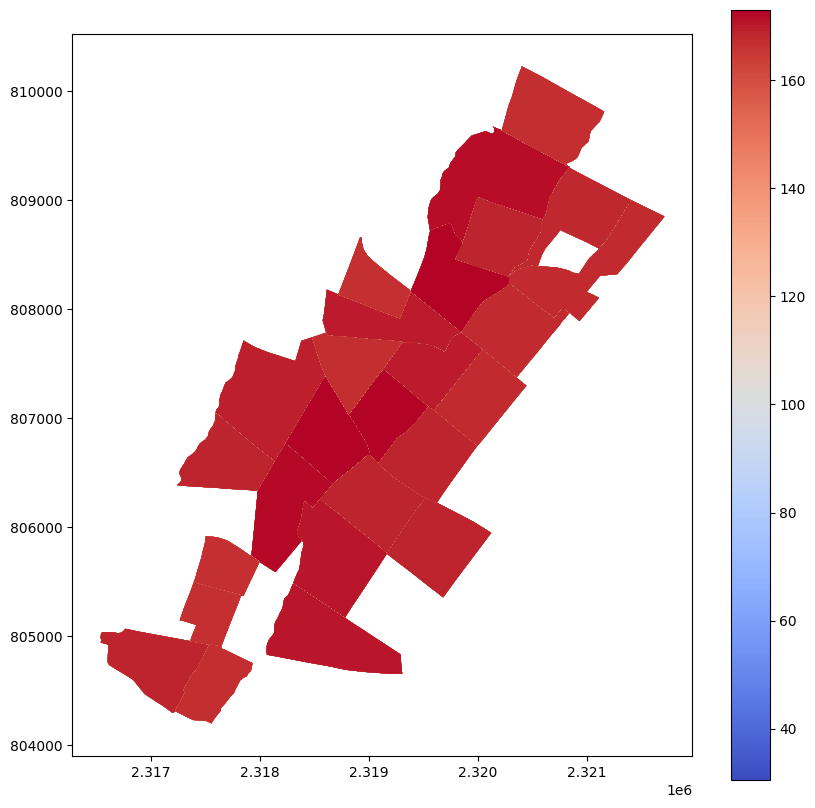

In [66]:
df_proceso2.plot(column="riesgo", cmap="coolwarm", figsize=(10,10), legend=True)

In [71]:
def plot_specific_time(time ):
  df = df_proceso2[df_proceso2["time"] == time]
  df.plot(column="riesgo", cmap="coolwarm", figsize=(10,10), legend=True)
  plt.title("Riesgo de inundación en la CDMX")
  plt.show()

    

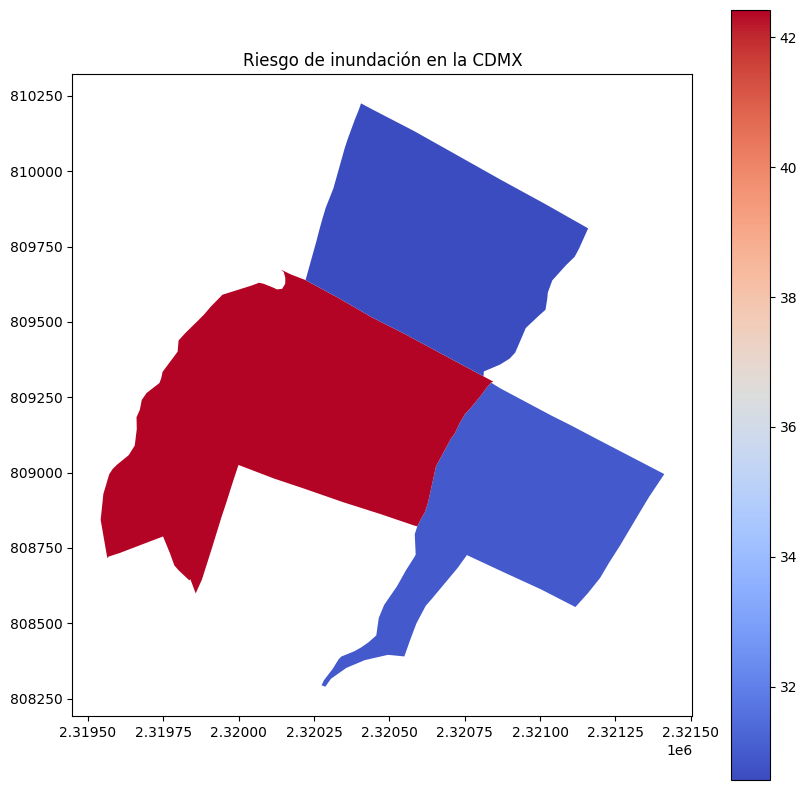

In [76]:
plot_specific_time(3600)